## Observations and Insights 

1) The study had a near identical number of male and female mice

2) Based on final tumor volume both Capomulin and Ramicane appeared to be equally effective out of all four drugs

3) Out Of these four drugs only Infubinol had one outlier data point - the rest were "well behaved" with the datasets not having any outliers.

4) Based on data for Campomulin, the correlation between mouse weight and the average (at that weight) tumor volume is very strong.

5) All drugs were tested on almost same number of mice

6) Looking at the data for drug Capomulin on mouse s185, shows that over the time tumor volume had reduced indicating Capomulin can be effective drug.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.

# Get the total number of records
total_records = combined_data["Mouse ID"].count()

# Get the total number of unique mice 
unique_mice = combined_data["Mouse ID"].nunique()

# Display values
pd.DataFrame({"Count of all Records" :[total_records], 
              "Count of unique mice" : [unique_mice]})

,Count of all Records,Count of unique mice
0,1893,249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = combined_data[combined_data.duplicated(["Mouse ID", "Timepoint"])]
duplicates

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
# Set the index of combined_data df to mouse_id
combined_data = combined_data.set_index("Mouse ID")

# Get all the data for mouse id got from above step 3
mouse = combined_data.loc["g989", :]

# Display data retrived
mouse

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,5,48.786801,0
g989,Propriva,Female,21,26,5,47.570392,0
g989,Propriva,Female,21,26,10,51.745156,0
g989,Propriva,Female,21,26,10,49.880528,0
g989,Propriva,Female,21,26,15,51.325852,1
g989,Propriva,Female,21,26,15,53.442020,0
g989,Propriva,Female,21,26,20,55.326122,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mice_data = combined_data.drop("g989")

# Reset the index of data frame
clean_data = clean_mice_data.reset_index()

# Display dataframe
clean_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1875,z969,Naftisol,Male,9,30,25,63.145652,2
1876,z969,Naftisol,Male,9,30,30,65.841013,3
1877,z969,Naftisol,Male,9,30,35,69.176246,4
1878,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
# Get the total number of records (rows)
new_total_records = clean_data["Mouse ID"].count()

# Get the number of unique Mouse ID's
new_unique_mice = clean_data["Mouse ID"].nunique()

# Display retrieved values as data frame
pd.DataFrame({"Count of all Records(New)" :[new_total_records], 
              "Count of unique mice(New)" : [new_unique_mice]})

,Count of all Records(New),Count of unique mice(New)
0,1880,248


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

# Create a group by object by grouping on "Drug Regimen"
drug_grouped = clean_data.groupby("Drug Regimen")

# Perform statistical methods to calculate mean, median, variance, standard deviation, and SEM on tumor volume.
Tumor_Vol_Mean = round(drug_grouped["Tumor Volume (mm3)"].mean(),3)
Tumor_Vol_Median = round(drug_grouped["Tumor Volume (mm3)"].median(),3)
Tumor_Vol_Variance = round(drug_grouped["Tumor Volume (mm3)"].var(),3)
Tumor_Vol_StDev = round(drug_grouped["Tumor Volume (mm3)"].std(),3)
Tumor_Vol_SEM = round(drug_grouped["Tumor Volume (mm3)"].sem(),3)

# Create a data frame with vaues obtained above
summary_stat_df = pd.DataFrame({"Tumor_Vol_Mean" : Tumor_Vol_Mean,
                                "Tumor_Vol_Median" : Tumor_Vol_Median,
                                "Tumor_Vol_Variance" : Tumor_Vol_Variance,
                                "Tumor_Vol_StDev" : Tumor_Vol_StDev,
                                "Tumor_Vol_SEM" : Tumor_Vol_SEM
                               })

# Reset the index of summary_df
summary_stat_df=summary_stat_df.reset_index()

# Display data of summary_df
summary_stat_df

,Drug Regimen,Tumor_Vol_Mean,Tumor_Vol_Median,Tumor_Vol_Variance,Tumor_Vol_StDev,Tumor_Vol_SEM
0,Capomulin,40.676,41.558,24.948,4.995,0.329
1,Ceftamin,52.591,51.776,39.290,6.268,0.470
2,Infubinol,52.885,51.821,43.129,6.567,0.492
3,Ketapril,55.236,53.699,68.554,8.280,0.604
4,Naftisol,54.332,52.509,66.173,8.135,0.596
5,Placebo,54.034,52.289,61.168,7.821,0.581
6,Propriva,52.321,50.446,43.852,6.622,0.544
7,Ramicane,40.217,40.673,23.487,4.846,0.321
8,Stelasyn,54.233,52.432,59.451,7.710,0.573
9,Zoniferol,53.237,51.818,48.533,6.967,0.516


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Create a group by object by grouping on "Drug Regimen" and use aggregation method, produce the same summary statistics 
drug_agg_grouped = clean_data.groupby("Drug Regimen").agg(
    Tumor_Vol_Mean=("Tumor Volume (mm3)", np.mean),
    Tumor_Vol_Median=("Tumor Volume (mm3)", np.median),
    Tumor_Vol_Variance=("Tumor Volume (mm3)", np.var),
    Tumor_Vol_StDev=("Tumor Volume (mm3)", np.std),
    Tumor_Vol_SEM=("Tumor Volume (mm3)", st.sem)
).round(3).reset_index()

# display values obtained above
drug_agg_grouped

,Drug Regimen,Tumor_Vol_Mean,Tumor_Vol_Median,Tumor_Vol_Variance,Tumor_Vol_StDev,Tumor_Vol_SEM
0,Capomulin,40.676,41.558,24.948,4.995,0.329
1,Ceftamin,52.591,51.776,39.290,6.268,0.470
2,Infubinol,52.885,51.821,43.129,6.567,0.492
3,Ketapril,55.236,53.699,68.554,8.280,0.604
4,Naftisol,54.332,52.509,66.173,8.135,0.596
5,Placebo,54.034,52.289,61.168,7.821,0.581
6,Propriva,52.321,50.446,43.852,6.622,0.544
7,Ramicane,40.217,40.673,23.487,4.846,0.321
8,Stelasyn,54.233,52.432,59.451,7.710,0.573
9,Zoniferol,53.237,51.818,48.533,6.967,0.516


## Bar and Pie Charts

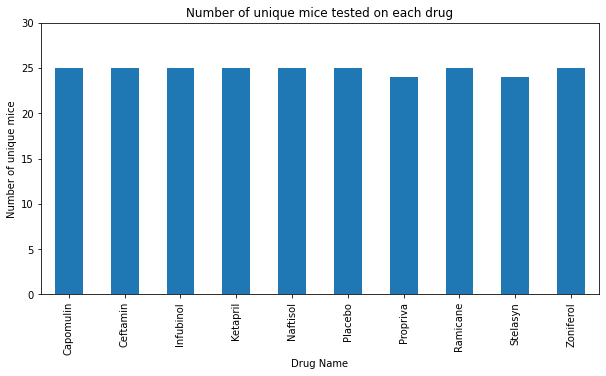

In [9]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.

# Groupby "Drug Regimen" on clean_data and get the unique mouse ID count per drug
drug_mice = clean_data.groupby("Drug Regimen")["Mouse ID"].nunique()
drug_mice = drug_mice.reset_index()

# plot bar graph on df obtained above
drug_mice_count_plot = drug_mice.plot(kind="bar", figsize=(10,5), title="Number of unique mice tested on each drug",
                                     xlabel = "Drug Name", ylabel = "Number of unique mice", 
                                     ylim = (0, drug_mice["Mouse ID"].max()+5), legend=False)

# set xticks ratation to 90
drug_mice_count_plot.set_xticklabels(drug_mice["Drug Regimen"], rotation=90)

# Save plot
drug_mice_count_plot.get_figure().savefig("Plot_Images/Drug_Mice_Bar_df.png", bbox_inches="tight")

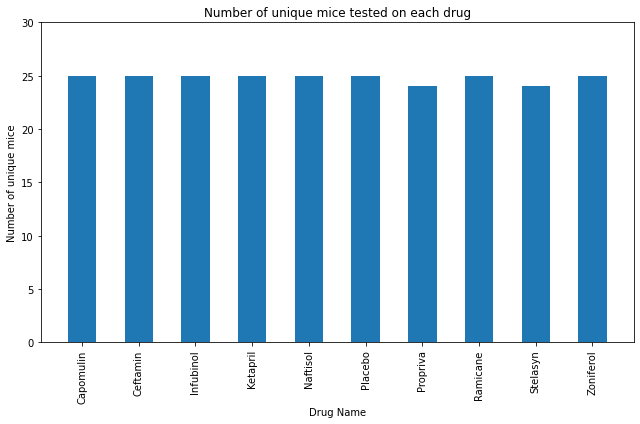

<Figure size 432x288 with 0 Axes>

In [10]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
# Set the figure size
plt.figure(figsize=(9,6))

# plot bar graph with drug on x-axis and Count on unique mose ID's on y-axis, with width set to 0.5
plt.bar(drug_mice["Drug Regimen"], drug_mice["Mouse ID"], width=0.5)

# Set x-ticks rotated 90 degree
plt.xticks(drug_mice["Drug Regimen"], rotation=90)

# Set title, x & y labels, y limits
plt.title("Number of unique mice tested on each drug")
plt.xlabel("Drug Name")
plt.ylabel("Number of unique mice")
plt.ylim(0, drug_mice["Mouse ID"].max()+5)
plt.tight_layout()

# Display Plot
plt.show()

# Save plot image
plt.savefig("Plot_Images/drug_mice_pyplot_Bar.png")

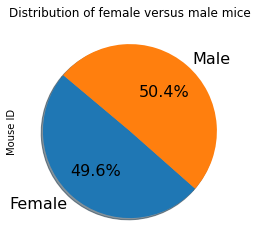

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
# First create a groupby object by grouping on the 'Sex' column
gender_stat = clean_data.groupby("Sex")

# Create a dataframe counting the number of data points for each gender
gender_count = pd.DataFrame(gender_stat["Mouse ID"].nunique())

#Plot the graph
gender_mouse_plot = gender_count.plot(kind="pie", y="Mouse ID", autopct="%1.1f%%", shadow=True, startangle=140, legend=False,
                                     fontsize=16, title="Distribution of female versus male mice")

# Save plot
gender_mouse_plot.get_figure().savefig("Plot_Images/Male_Female_Pie_df.png", bbox_inches="tight")

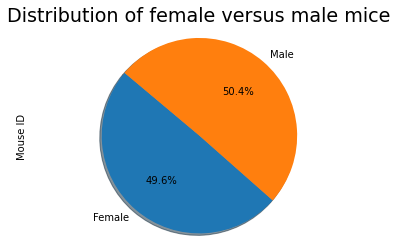

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Get the list of genders from the index values
genders = list(gender_count.index.values)

# Get the unique mouse id on gender
gen_count = gender_stat["Mouse ID"].nunique()

#Plot the graph
plt.pie(gen_count, labels = genders, autopct="%1.1f%%", shadow=True, startangle=140)

# Set the font size, title & ylabel
plt.rcParams['font.size'] = 16
plt.title("Distribution of female versus male mice")
plt.ylabel("Mouse ID")
plt.axis("equal")

# Save plot image
plt.savefig("Plot_Images/Male_Female_Pie_pyplot.png")

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Get the data for above drugs to another df
drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
four_drug_data = clean_data[clean_data["Drug Regimen"].isin(drug_list)]

# Start by getting the last (greatest) timepoint for each mouse
four_drug_data = four_drug_data.groupby(["Drug Regimen", "Mouse ID"])["Timepoint"].max()
four_drug_data = four_drug_data.reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
top_drug = pd.merge(four_drug_data, clean_data[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]],
                    on=["Mouse ID", "Timepoint"], how="left")

# Display data frame created above
top_drug

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
0,Capomulin,b128,45,38.982878
1,Capomulin,b742,45,38.939633
2,Capomulin,f966,20,30.485985
3,Capomulin,g288,45,37.074024
4,Capomulin,g316,45,40.159220
...,...,...,...,...
95,Ramicane,s508,45,30.276232
96,Ramicane,u196,45,40.667713
97,Ramicane,w678,5,43.166373
98,Ramicane,y449,15,44.183451


In [14]:
# Put treatments into a list for for loop (and later for plot labels)

# Create list of empty list to fill with tumor vol data (for plotting)
# drug list declared above is as below with their indices:
# 0 - Capomulin , so add tumor volume with this drug at index 0 of Tumor Vol list tumor_vol
# 1 - Ramicane , so add tumor volume with this drug at index 1 of Tumor Vol list tumor_vol
# 2 - Infubinol , so add tumor volume with this drug at index 2 of Tumor Vol list tumor_vol
# 3 - Ceftamin , so add tumor volume with this drug at index 3 of Tumor Vol list tumor_vol

tumor_vol = [[] for i in range(len(drug_list))]

# Iterate through a dataframe created before whcih contains data for four drungs 
for i in range (len(top_drug)):
    # With iloc methd get the drug name & tumor volume from each row
    drug = top_drug.iloc[i,:]["Drug Regimen"]
    t_vol = round(top_drug.iloc[i,:]["Tumor Volume (mm3)"],3)
    
    # Iterate through a list of four drugs with index
    for j in range(len(drug_list)):
        
        # If drug name from list matches with the drug from data frame, 
        # add tumor volume to list with same index inside a list
        if drug == drug_list[j]:
            tumor_vol[j].append(t_vol)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds
    
counter = 0 # counter is declared to track the first iteration

# Iterate through list of four drugs
for drug in drug_list:
    # From drug df , if drug name matches the one from list, add tumor volume to df
    drug_df = top_drug.loc[top_drug["Drug Regimen"]== drug,"Tumor Volume (mm3)"]
    
    # Get the quartiles, Q1, Q3 & IQR of tumor volume for specific drug
    # Calculate lowe & upper bound to get potential outliers
    quartiles = drug_df.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    
    # Print the data received. Counter is used to print the dotted line only on top & increment counter
    if counter == 0:
        print("-----------------------------------------------------------")
        counter +=1
    print(f"The lower quartile of {drug} tumor volume is: {lowerq}")
    print(f"The upper quartile of {drug} tumor volume is: {upperq}")
    print(f"The interquartuile range of {drug} tumor volume is: {iqr}")
    print(f"The median of {drug} tumor volume is: {quartiles[0.5]}")
    print(f"Values below {lower_bound} could be outliers for {drug} tumor volume")
    print(f"Values above {upper_bound} could be outliers for {drug} tumor volume")
    print("-----------------------------------------------------------")
    

-----------------------------------------------------------
The lower quartile of Capomulin tumor volume is: 32.37735684
The upper quartile of Capomulin tumor volume is: 40.1592203
The interquartuile range of Capomulin tumor volume is: 7.781863460000004
The median of Capomulin tumor volume is: 38.125164399999996
Values below 20.70456164999999 could be outliers for Capomulin tumor volume
Values above 51.83201549 could be outliers for Capomulin tumor volume
-----------------------------------------------------------
The lower quartile of Ramicane tumor volume is: 31.56046955
The upper quartile of Ramicane tumor volume is: 40.65900627
The interquartuile range of Ramicane tumor volume is: 9.098536719999998
The median of Ramicane tumor volume is: 36.56165229
Values below 17.912664470000003 could be outliers for Ramicane tumor volume
Values above 54.30681135 could be outliers for Ramicane tumor volume
-----------------------------------------------------------
The lower quartile of Infubinol

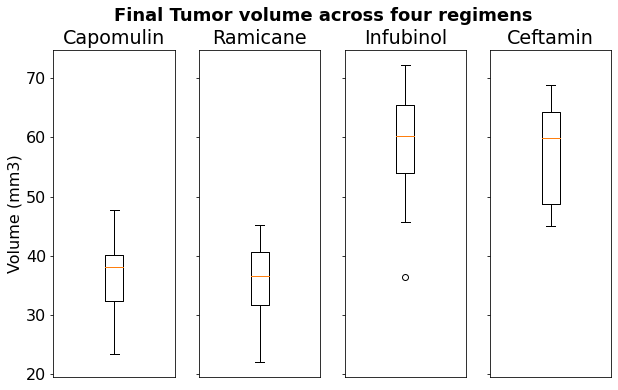

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# To plot boxplots for all four drugs in same figure, declard axs as array with one row and four columns,
fig1,axs = plt.subplots(nrows=1, ncols=4, sharey=True, figsize=(10,6))

#Set title for the figure
fig1.suptitle('Final Tumor volume across four regimens', fontsize=18, fontweight='bold')

# Set Y lable
axs[0].set_ylabel('Volume (mm3)')

# Set the title, draw boxplots with drug & tumor volume list and set xticks to emplt list 
# ax[0] is for drug Capomulin 
axs[0].set_title(drug_list[0])
axs[0].boxplot(tumor_vol[0])
axs[0].set_xticks([])

# ax[1] is for drug Ramicane  
axs[1].set_title(drug_list[1])
axs[1].boxplot(tumor_vol[1])
axs[1].set_xticks([])

# ax[2] is for drug Infubinol   
axs[2].set_title(drug_list[2])
axs[2].boxplot(tumor_vol[2])
axs[2].set_xticks([])

# ax[3] is for drug Ceftamin 
axs[3].set_title(drug_list[3])
axs[3].boxplot(tumor_vol[3])
axs[3].set_xticks([])

# Save Plot Image
fig1.savefig("Plot_Images/Boxplot.png")

## Line and Scatter Plots

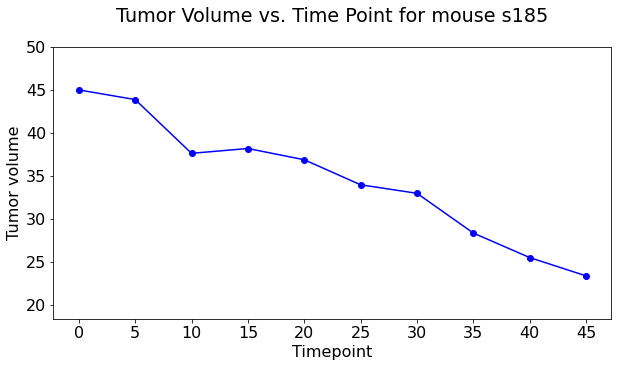

<Figure size 432x288 with 0 Axes>

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# get the data for drug Capomulin from clean_data
Capomulin_data = clean_data.loc[clean_data["Drug Regimen"] == "Capomulin",:]

# Display A DataFrame & get any mouse id
Capomulin_data

# Get all the data for Mouse ID using loc method from Capomulin data
single_mouse_data = Capomulin_data.loc[Capomulin_data["Mouse ID"] == "s185",:]

# Set the figure size
plt.figure(figsize=(10,5))

# Plot the line graph with Timepoint as x axis & Tumor Volume as Y axis from Signe Mouse data
plt.plot(single_mouse_data["Timepoint"], single_mouse_data["Tumor Volume (mm3)"], marker ='o', color='blue')

# Set the title , x & T label, ylimit & xticks
plt.title("Tumor Volume vs. Time Point for mouse s185", pad=25)
plt.xlabel("Timepoint")
plt.ylabel("Tumor volume")
plt.ylim((single_mouse_data["Tumor Volume (mm3)"].min()) - 5,(single_mouse_data["Tumor Volume (mm3)"].max()) + 5)
plt.xticks(np.arange(0,50,5))

# Display plot
plt.show()

# Save plot image
plt.savefig("Plot_Images/sigle_mouse_line_graph.png")

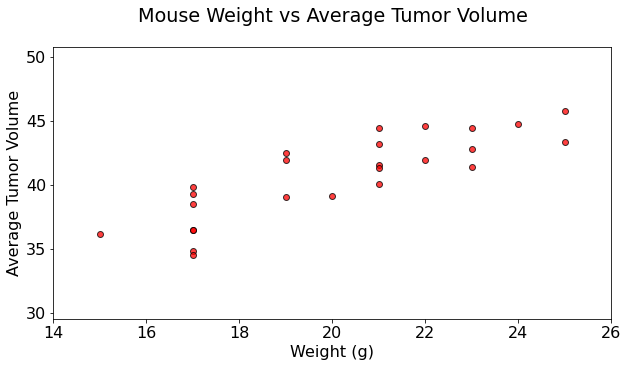

<Figure size 432x288 with 0 Axes>

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
# Perform a groupby operation on capomulin drug data on Mouse ID & weight and get the average tumor volume  
weight_vol_data = Capomulin_data.groupby(["Mouse ID", "Weight (g)"]).agg(Avg_Tumor_Vol=("Tumor Volume (mm3)", np.mean))
weight_vol_data = weight_vol_data.reset_index()

# set the figure size
plt.figure(figsize=(10,5)) 

# plot scatter plot with weight as x axis & avg tumor volume as y-axis.
plt.scatter(weight_vol_data["Weight (g)"], weight_vol_data["Avg_Tumor_Vol"], marker="o", facecolors="red",
            edgecolors="black", alpha=0.75)

# Set the title, xlabel, ylabel, xlim & ylim
plt.title("Mouse Weight vs Average Tumor Volume", pad=25)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume")
plt.ylim((weight_vol_data["Avg_Tumor_Vol"].min()) - 5,(weight_vol_data["Avg_Tumor_Vol"].max()) + 5)
plt.xlim(14,26)

# Display plot
plt.show()

# Save plot image
plt.savefig("Plot_Images/weight_Avg_tumorvol_scatter.png")

## Correlation and Regression

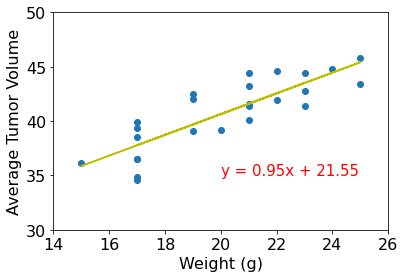

r squared value is : 0.7088568047708717
The correlation coefficient between weight and average final tumor volume is 0.84


<Figure size 432x288 with 0 Axes>

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# Get the linear equation
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weight_vol_data["Weight (g)"], weight_vol_data["Avg_Tumor_Vol"])
regress_values = weight_vol_data["Weight (g)"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the scatter plot 
plt.scatter(weight_vol_data["Weight (g)"],weight_vol_data["Avg_Tumor_Vol"])
plt.plot(weight_vol_data["Weight (g)"],regress_values,"-y")

# Annotate the line_equation on graph
plt.annotate(line_eq,(20,35),fontsize=15,color="red")

# Set label & limits for x & y axis
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume")
plt.xlim(14,26)
plt.ylim(30,50)

# Display a plot
plt.show()

# save plot image
plt.savefig("Plot_Images/linear_equation_plot.png")


# Calculate correlation & display it 
correlation = st.pearsonr(weight_vol_data["Weight (g)"], weight_vol_data["Avg_Tumor_Vol"])
print(f"r squared value is : {rvalue ** 2}")
print(f"The correlation coefficient between weight and average final tumor volume is {round(correlation[0],2)}")